# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

- *I have installed pandas, numpy, matplotlib and seaborn using Anaconda, so that i don't need to install libraries for all the notebooks individually*

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

- *I am running the jupyter from my local machine so I don't need to run google colab*

In [4]:
# loading dataset into dataframe
df = pd.read_csv('foodhub_order.csv')

In [5]:
# head() method returns first 5 records by default
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# shape attribute used to understand data shape
df.shape

(1898, 9)

#### Observations:

1898 rows and 9 columns are present in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# info()N method retunrs information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

We can observe that there 4 object datatype columns and 5 numerical datatype

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# check for missing values in each column of the dataset
print(f"The missing values in each column of the dataset are :\n{df.isnull().sum()}\n")
print('-------------------------------------------------------------------')
# check for missing values in the entire dataset
print(f"The missing values in the entire dataset are : {df.isnull().sum().sum()}")

The missing values in each column of the dataset are :
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

-------------------------------------------------------------------
The missing values in the entire dataset are : 0


#### Observations:
No misssing data as such, which can be inferred that there are NO null values or missing data in the entire dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:

* Minimum time to prepare the food - 20 minutes
* Average time to prepare the food - 27 minutes
* Maximum time to prepare the food - 35 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
There are 736 orders which not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### **Lets explore the numerical variables.**

#### **Observations on `order id`**

In [11]:
# check if there are any duplicate orders
df['order_id'].duplicated().sum()

0

- *There are no duplicate orders*

#### **Observations on `customer id`**

In [12]:
# unique coustomers
print(f"There are {len(df['customer_id'].unique())} unique customers in the data set")
# customers placed order more than once
print(f"There are {df['customer_id'].duplicated().sum()} customers who have placed orders more than once")

There are 1200 unique customers in the data set
There are 698 customers who have placed orders more than once


- *1200 Unique customers with ~ 58% customers have placed the order at least more than once*

#### **Observations on `cost of the order`**

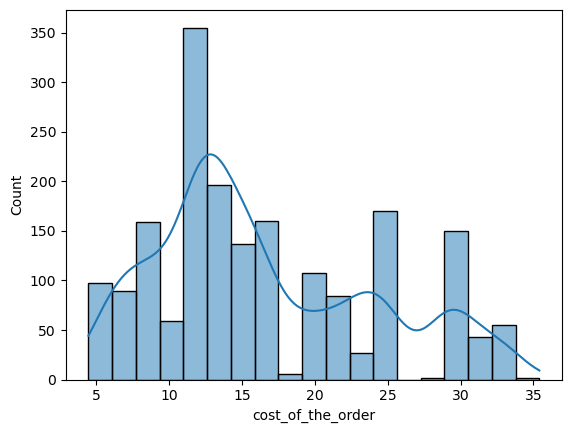

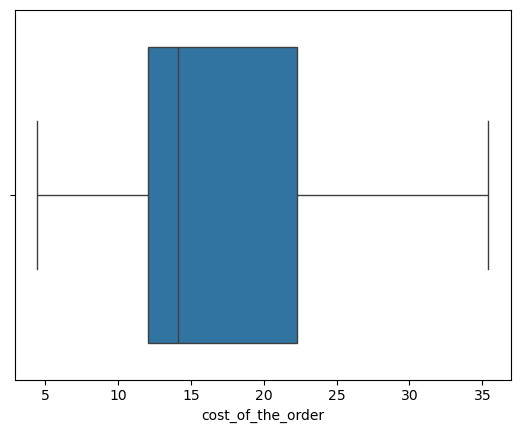

In [13]:
# Cost of the Order
sns.histplot(data=df,x='cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

- *The distribution of cost of the order is highly right skewed*
- *There are no outliers for this variable* 

#### **Observations on `food preparation time`**

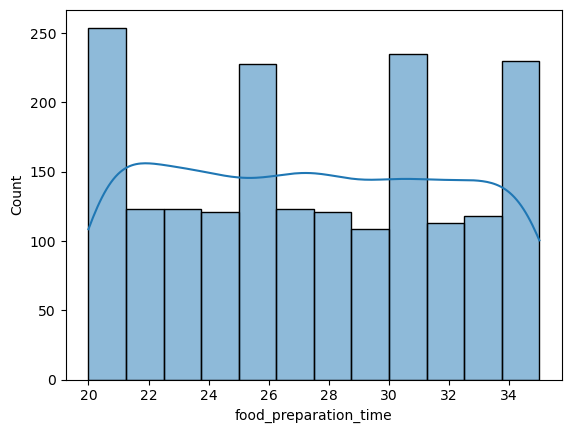

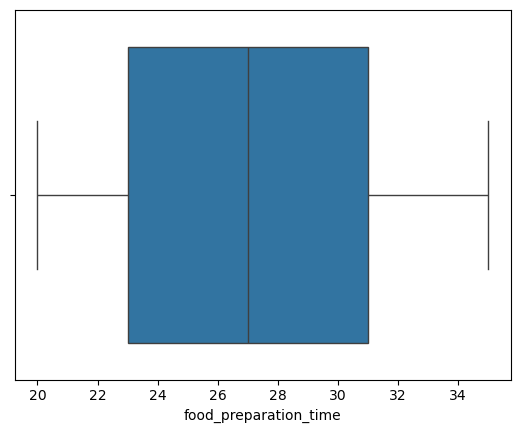

In [14]:
# food preparation time
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

- *The distribution of food preparation time is normally distributed*
- *There are no outliers for this variable*
- *Most observed time is 27 mins, that means most of the time, food was prepared in 27 mins*

#### **Observations on `delivery time`**

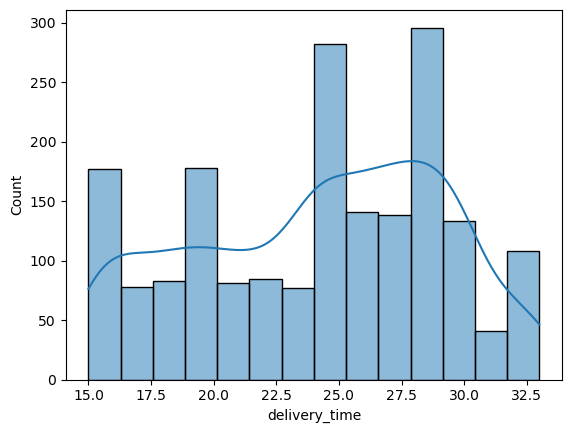

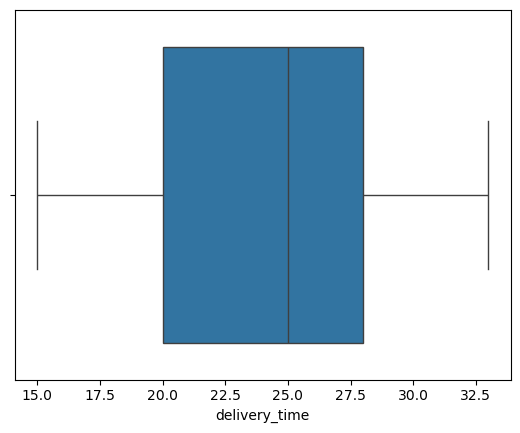

In [15]:
# delivery time
sns.histplot(data=df,x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

- *The distribution of delivery time is left skewed*
- *There are no outliers in this variable* 
- *Most of the deliveries are done within 25 mins*

### **Let's explore the categorical variables.**

#### **Observations on `restaurant_name`**

In [16]:
print(f"There are {len(df['restaurant_name'].unique())} unique restaurant in the data set")

There are 178 unique restaurant in the data set


- *178 unique restaurants in dataset*

#### **Observations on `cuisine_type`**

There are 14 unique cuisine types in the data set
--------------------------------------------------
Cuisines % being ordered in the give dataset 
--------------------------------------------------
cuisine_type
American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: proportion, dtype: float64
--------------------------------------------------


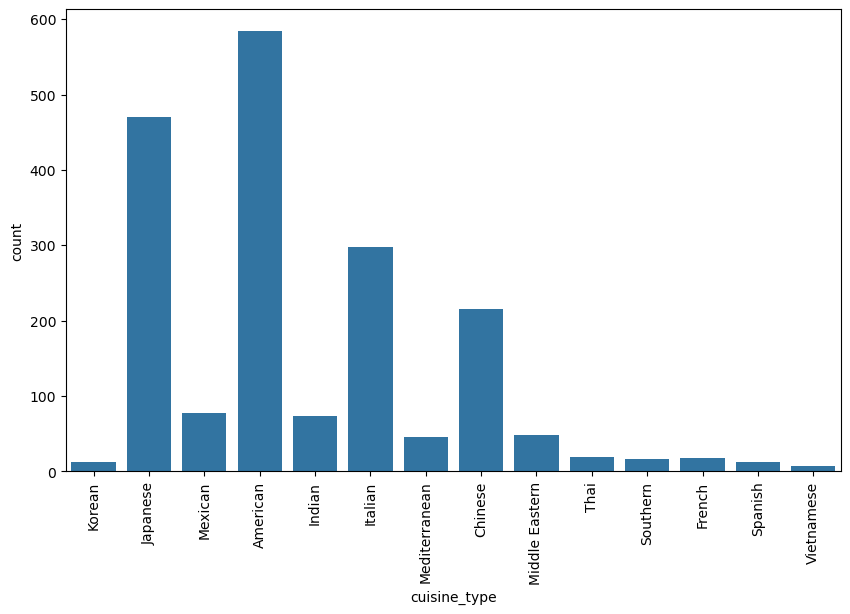

In [17]:
print(f"There are {len(df['cuisine_type'].unique())} unique cuisine types in the data set")
print('--------------------------------------------------')
print("Cuisines % being ordered in the give dataset ")
print('--------------------------------------------------')
print(df['cuisine_type'].value_counts(normalize=True)*100)
print('--------------------------------------------------')
# Bar plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

- *There are total 14 unique cuisine in the dataset*
- *American cuisine is ordered the most, ~30% of total orders, followed by Japanese ~25% and Italian ~16%*
- *Few cuisines like French, Southern, Korean, Spanish and Vietnamese are ordered less than 4% of the total orders*

#### **Observations on `day_of_the_week`**

--------------------------------------------------
Frequency on days when the orders are placed
--------------------------------------------------
day_of_the_week
Weekend    71.18019
Weekday    28.81981
Name: proportion, dtype: float64
--------------------------------------------------


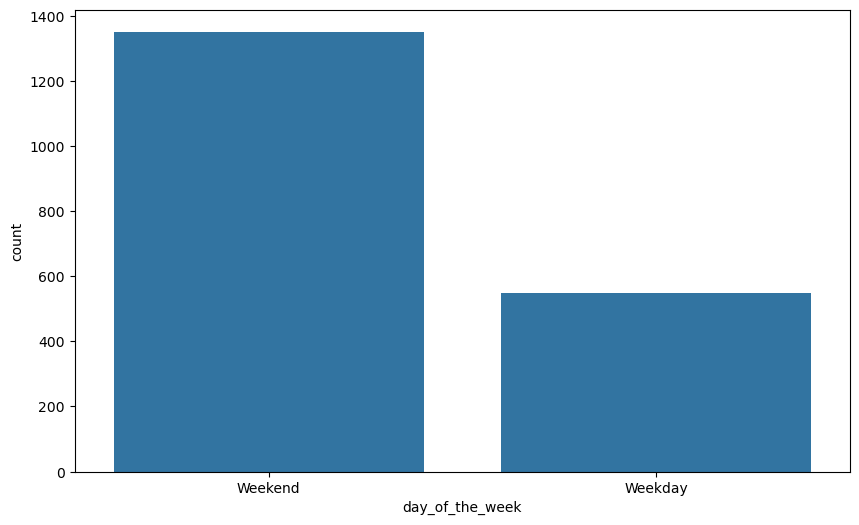

In [18]:
print('--------------------------------------------------')
print('Frequency on days when the orders are placed')
print('--------------------------------------------------')
print(df['day_of_the_week'].value_counts(normalize=True)*100)
print('--------------------------------------------------')
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day_of_the_week');
plt.show()

- *71% of orders are placed over weekend*
- *29% of orders are placed over weekdays*
- *This infers that more orders are placed over weekend*

#### **Observations on `rating`**

--------------------------------------------------
Frequency on rating
--------------------------------------------------
rating
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: proportion, dtype: float64
--------------------------------------------------


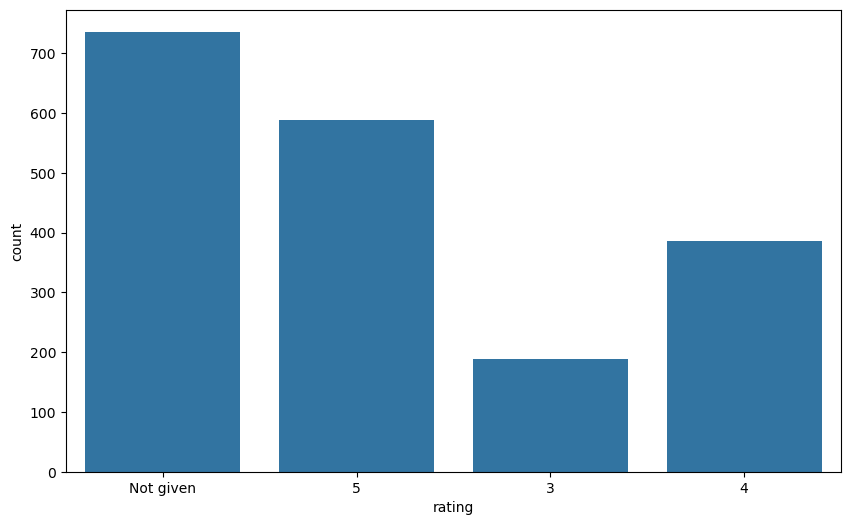

In [19]:
print('--------------------------------------------------')
print('Frequency on rating')
print('--------------------------------------------------')
print(df['rating'].value_counts(normalize=True)*100)
print('--------------------------------------------------')
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating');
plt.show()

- *40% of orders are not rated*
- *30% of orders have rating 5 followed by 20% with rating 4*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
df['restaurant_name'].value_counts().head() # value_counts() in descending order by default

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

Top 5 restaurants are : 

* Shake Shack
* The Meatball Shop 
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# extract dataframe only for weekend orders
weekend_df = df[df['day_of_the_week'] == 'Weekend']
# count total orders by cuisine types. value_counts() returns the data in descending order by default
weekend_df['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
Most popular cuisine on weekends is American. Its being ordered 415 times


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# total orders in the dataframe
total_number_of_orders = df.shape[0]

# Extract dataframe cost more than 20 dollar
orders_20_above  = df[df['cost_of_the_order'] > 20].shape[0]

# Percentage of orders greater than 20 dollars
order_percentage = (orders_20_above  / total_number_of_orders) * 100

print("Percentage of orders cost more than $20 : ", round(order_percentage, 2),'%')

Percentage of orders cost more than $20 :  29.24 %


#### Observations:
* Percentage of orders cost more than $20 :  29.24 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# EDA can be done on delivery_type variable
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:
Mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Extract the top 3 most frequent customers
frequent_customer_df = df['customer_id'].value_counts().head(3) # value_counts() return the data in descending order by default.

for customer_id, order_count in frequent_customer_df.items():
    print(f"Customer ID {customer_id} placed {order_count} orders")

Customer ID 52832 placed 13 orders
Customer ID 47440 placed 10 orders
Customer ID 83287 placed 9 orders


#### Observations:
* Customer ID 52832 placed 13 orders
* Customer ID 47440 placed 10 orders
* Customer ID 83287 placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Lets first understand the relationship between all the `numerical values` in the dataset. 

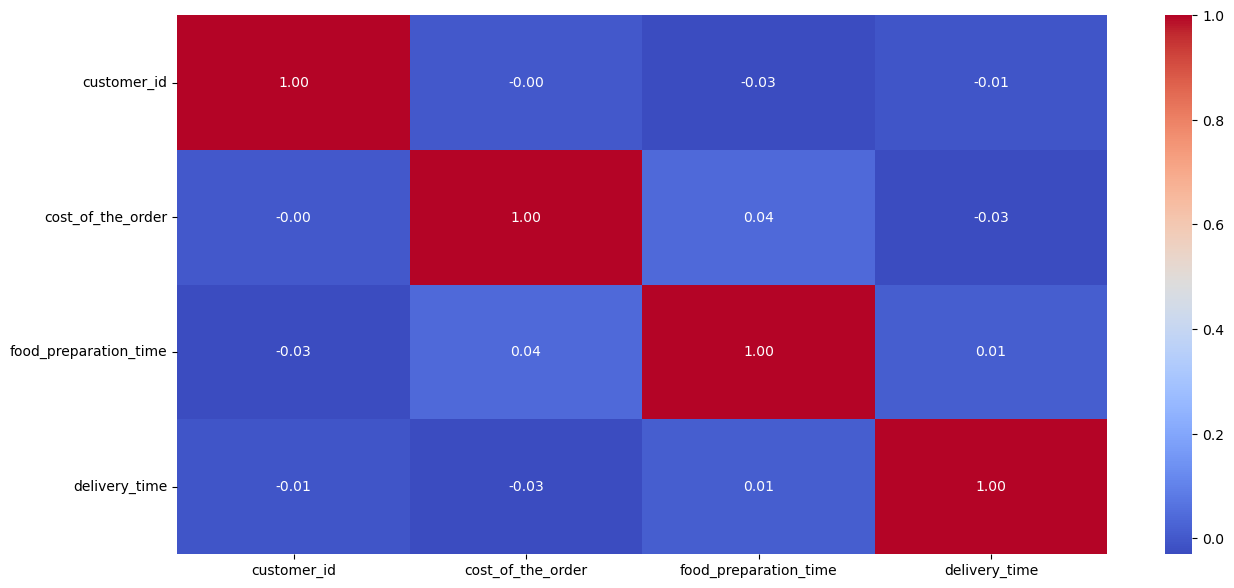

In [25]:
# heatmap plot to understand the relationship between all the numerical varaibles
numeric_columns = ['customer_id','cost_of_the_order','food_preparation_time', 'delivery_time'] # list of all numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(data=df[numeric_columns].corr(), annot=True,fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

##### Observations:

Heatmap study:

* `Positive coorelations`: no positive correlation (value > 0.7) found between any pairs of numerical values in the datasets
* `Negative correlations`: no negative correlation (value < 0.7) found between any pairs of numerical values in the datasets
* `Weak correlations`: many variables have weak correlation between -0.03 to 0.04.

Due to missing correlations between the numeric variables, they are mostly independent to each other. This lead to further analysis on how the categorical variables are connected to each other.


#### Lets understand the relationship between all the categorical and numerical values in the dataset. 

##### Relationship between `cuisine_type` and `rating`

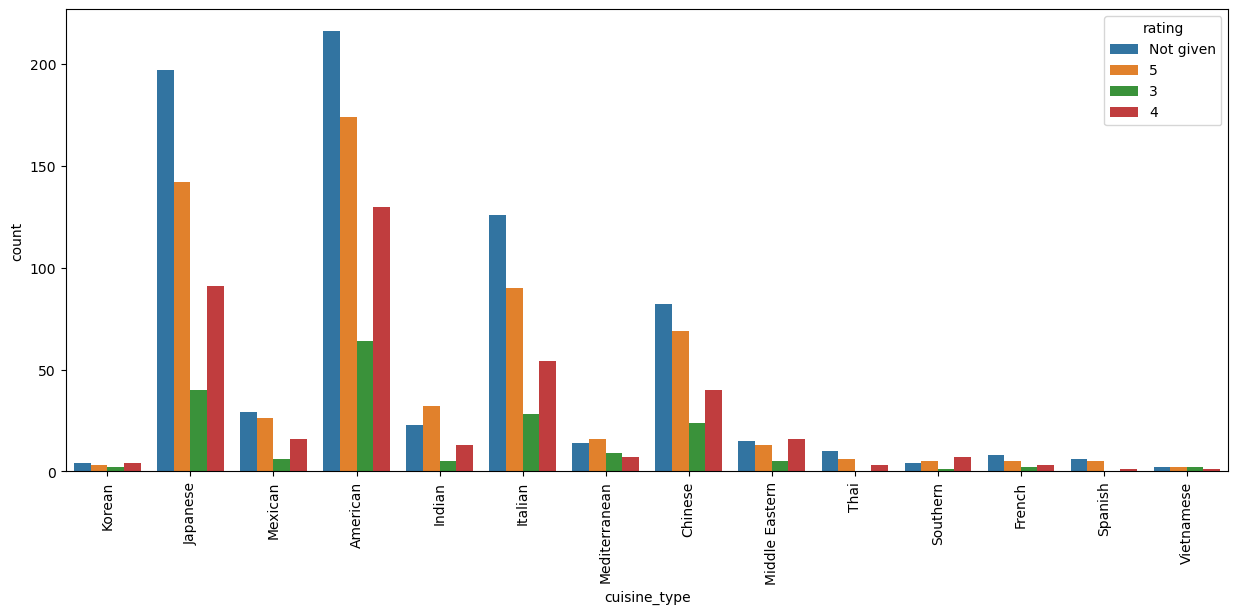

In [26]:
plt.figure(figsize=(15,6)) 
sns.countplot(data= df, x='cuisine_type', hue='rating')
plt.xticks(rotation=90)
plt.show()

- *Most rated cuisine_types are American, Japanese, Italian and Chinees with rating 5 and 4.*
- *Same time, these 4 cuisine types are also not given any rating.* 
- *Mexican and Indian cuisine are next given 5 and 4 rating.*

##### Relationship between `cuisine_type` and the `day_of_the_week`

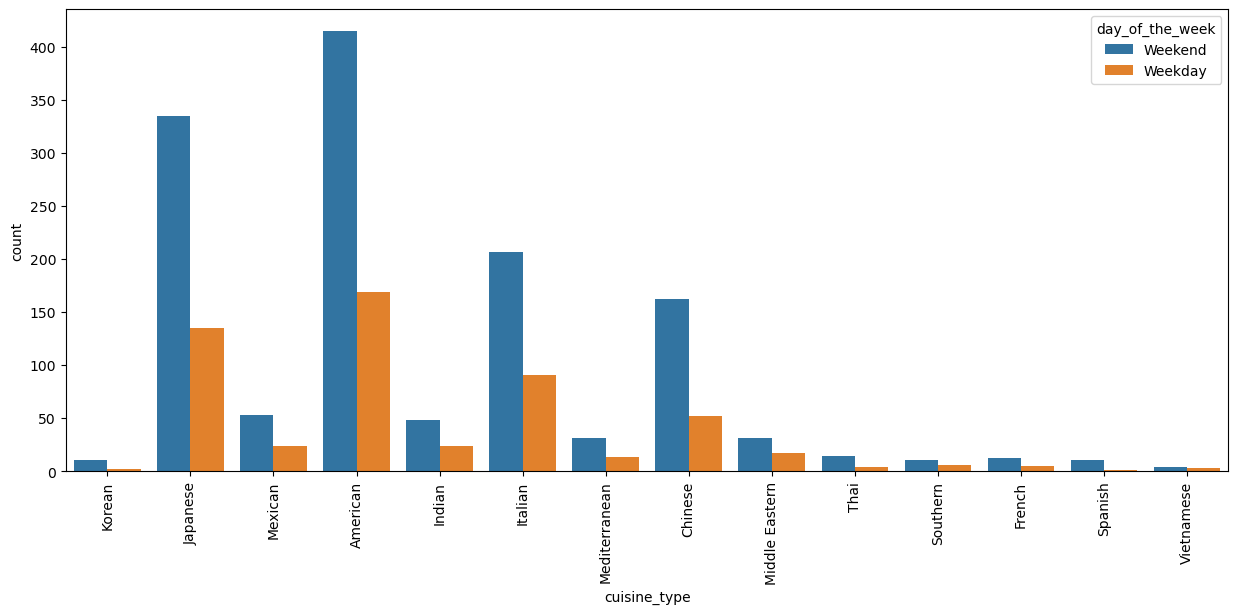

In [27]:
plt.figure(figsize=(15,6)) 
sns.countplot(data= df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

- *Relationship between cuisine type and day_of_the_week showing that most of the time food is ordered over weekend*
- *Cuisine_types are American, Japanese, Italian and Chinees are among the most ordered so there is a strong demand of these types of food*

##### Relationship between `cuisine_type` and `cost_of_the_order`

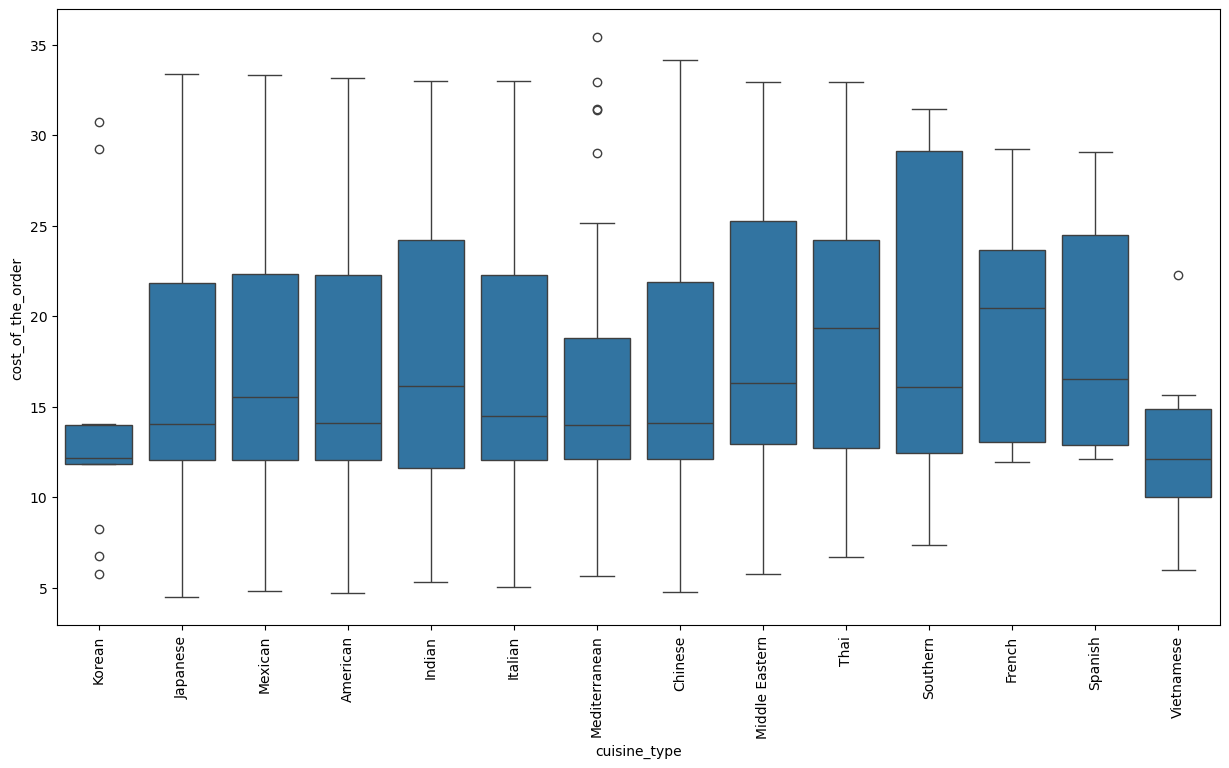

In [28]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

- *Average cost of the food is less than 16*
- *There are outliers for Korean, Mediterranean and Vietnamese cuisine types*
- *Majoiry of the cuisine are under 20*

##### Relationship between `cuisine_type` and the `delivery_time`

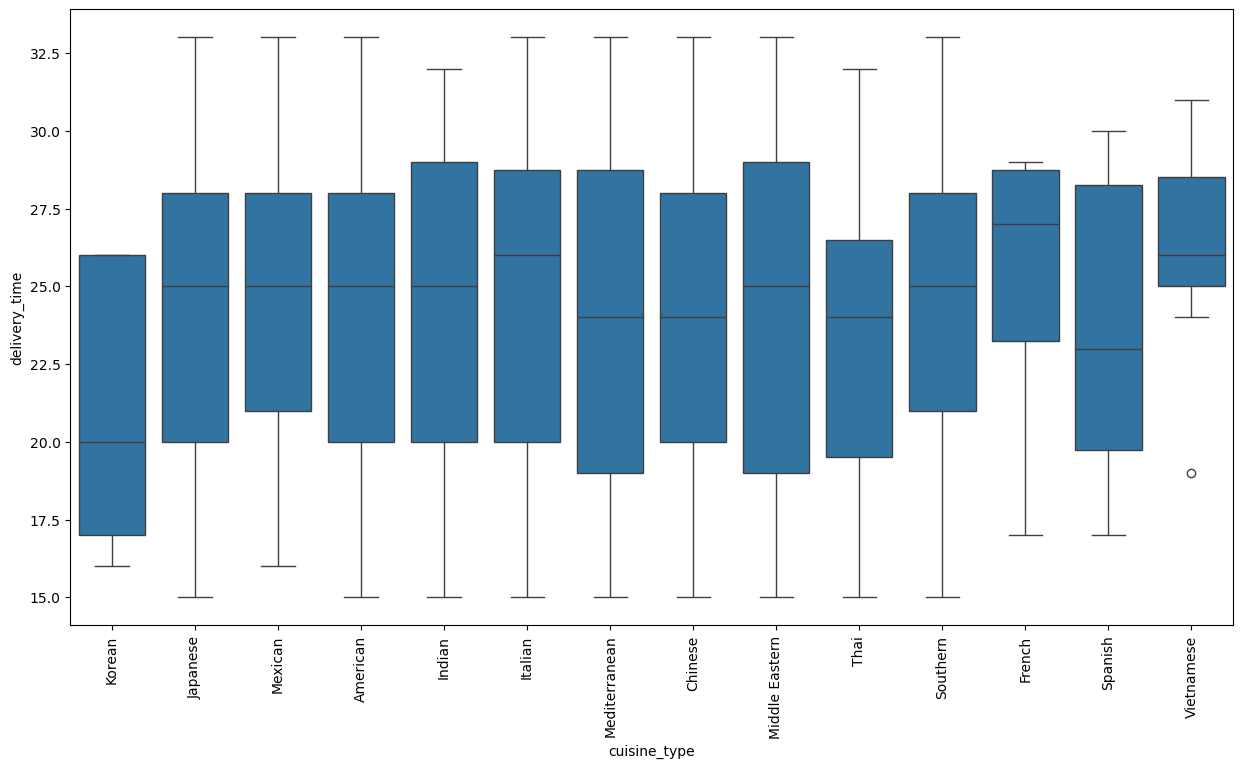

In [29]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=90)
plt.show()

Delivery Time for almost all types of cuisine is ~25 minutes

##### Relationship between `cuisine_type` and the `food_preparation_time`

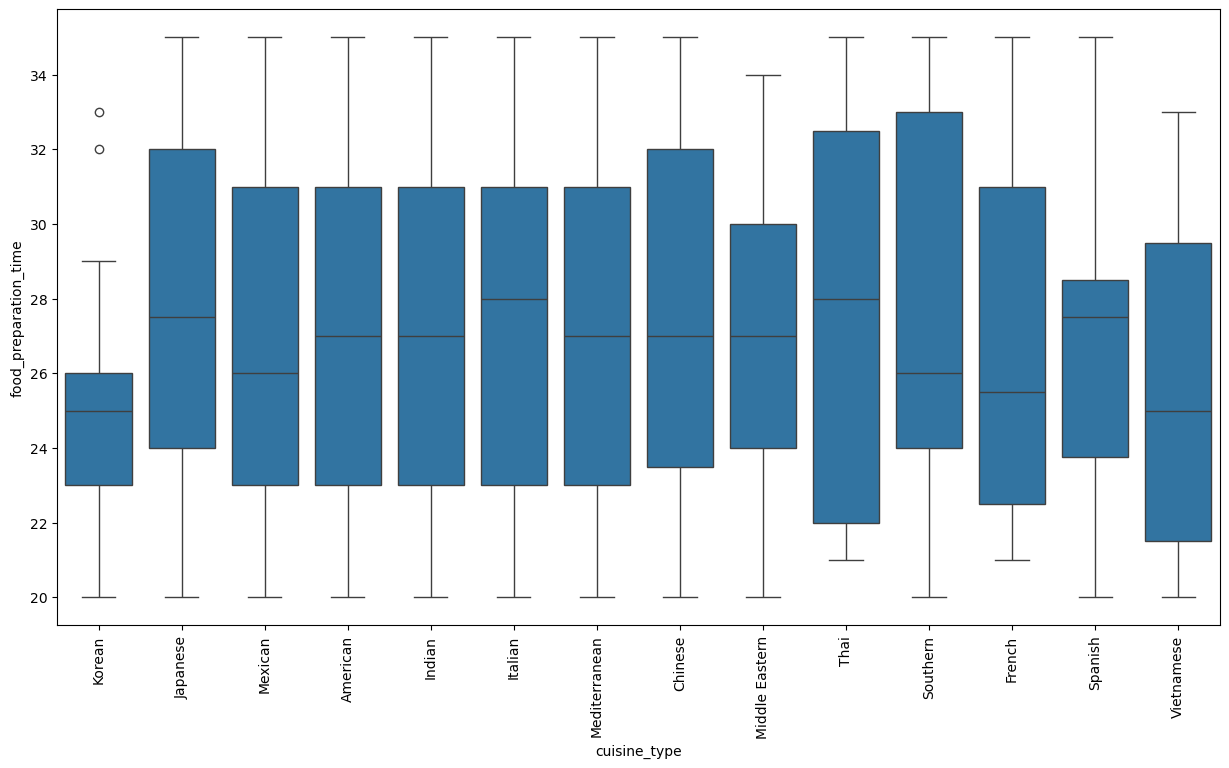

In [30]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

- *Food preparation time for almost all types of cuisine is ~27 minutes*
- *Outliers for Korean cuisine*

##### Relationship between `rating` and the `delivery_time`

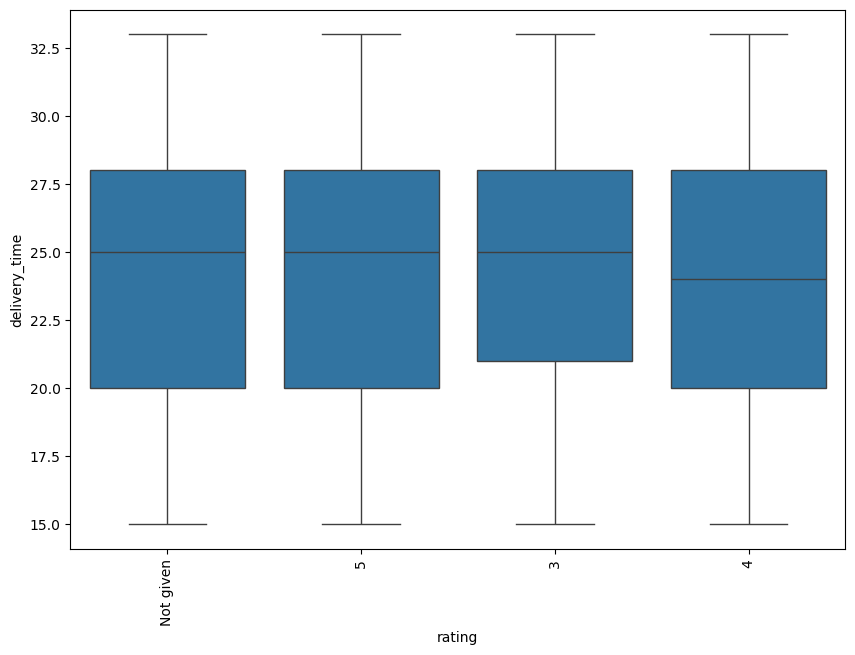

In [31]:
plt.figure(figsize=(10,7)) 
sns.boxplot(data=df, x='rating', y='delivery_time')
plt.xticks(rotation=90)
plt.show()

- *Delivery Time is consistent for all ratings*

##### Relationship between `rating` and the `food_preparation_time`

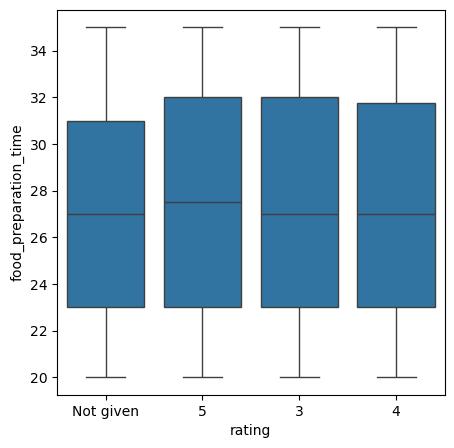

In [32]:
plt.figure(figsize=(5,5)) 
sns.boxplot(data=df, x='rating', y='food_preparation_time')
plt.show()

- *Most of the time, food is prepared within 27 mins across all ratings*

##### Relationship between `rating` and the `cost_of_the_order`

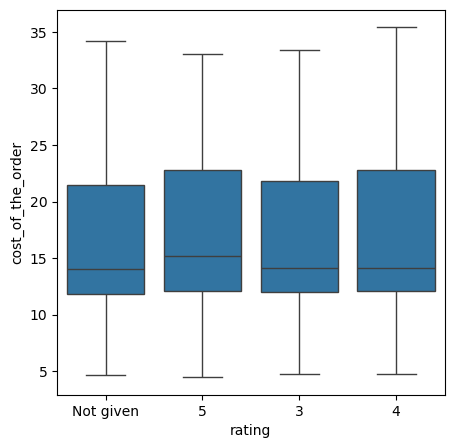

In [33]:
plt.figure(figsize=(5,5)) 
sns.boxplot(data=df, x='rating', y='cost_of_the_order')
plt.show()

- *For all ratings 3,4, and 5, the cost of the food is in the range of 12 to 22*

##### Lets findout the top 3 most selling restaurant in the dataset

In [34]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

Top 3 Restaurant making the revenue are Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Filter the rated restaurants (remove rows with 'Not given' in the 'rating' column)
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert 'rating' column from object (string) to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Calculate the rating count per restaurant
rating_count = df_rated.groupby('restaurant_name')['rating'].size().reset_index(name='rating_count')

# Calculate the average rating per restaurant
average_rating = df_rated.groupby('restaurant_name')['rating'].mean().reset_index(name='average_rating')

# Merge the rating count and average rating DataFrames
df_rating_count = pd.merge(rating_count, average_rating, on='restaurant_name')

# Filter restaurants where rating_count > 50 and average_rating > 4
filtered_restaurants = df_rating_count[(df_rating_count['rating_count'] > 50) & (df_rating_count['average_rating'] > 4)]

print("Restaurants fulfilling the criteria of Rating Count Greater Than 50 and Average Rating Greater Than 4 ")
print('-------------------------------------------------------------------------')
print(filtered_restaurants)
print('-------------------------------------------------------------------------')


Restaurants fulfilling the criteria of Rating Count Greater Than 50 and Average Rating Greater Than 4 
-------------------------------------------------------------------------
               restaurant_name  rating_count  average_rating
16   Blue Ribbon Fried Chicken            64        4.328125
17           Blue Ribbon Sushi            73        4.219178
117                Shake Shack           133        4.278195
132          The Meatball Shop            84        4.511905
-------------------------------------------------------------------------


#### Observations:

- *Here are the names of the restaurants which will meet the promotional criteria*

   - *Blue Ribbon Fried Chicken (Rating Count: 64, Average Rating: 4.33)*   
   - *Blue Ribbon Sushi (Rating Count: 73, Average Rating: 4.21)*          
   - *Shake Shack (Rating Count: 133, Average Rating: 4.27)*                
   - *The Meatball Shop (Rating Count: 84, Average Rating: 4.51)*          


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [36]:
# function to calculate revenue
def revenue(order_cost):
    if order_cost > 20:
        return order_cost * 0.25
    elif order_cost > 5:
        return order_cost * 0.15
    else:
        return order_cost * 0
        
# Add a revenue column in dataframe to calculate revenue for each order based on the revenue model being designed for the services
df['Company_Revenue'] = df['cost_of_the_order'].apply(revenue)

net_revenue = df['Company_Revenue'].sum()
print(f"Net Revenue generated by the company is approximately ${round(net_revenue, 2)}")


Net Revenue generated by the company is approximately $6166.3


#### Observations:

- *Net Revenue generated by company is $6166.30*


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [37]:
# add a column in the dataset for total time --> food prepared + food delivered
df['total_time'] = df['food_preparation_time'] + df['delivery_time'] 

# total time taken more than 60 minutes
df_total_time_60 = df[df['total_time'] > 60 ] 

# Percentage over total time taken more than 60 minustes to total numbers of orders 
percentage = round((df_total_time_60.shape[0] / df.shape[0]) * 100 , 2)

print(f"Percentage of orders taken more than 60 minutes to get dlivered from the time the order is placed --> {percentage}%")


Percentage of orders taken more than 60 minutes to get dlivered from the time the order is placed --> 10.54%


#### Observations:
- *Percentage of orders taken more than 60 minutes to get dlivered from the time the order is placed --> 10.54%*




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [38]:
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean() # calculate weekday mean delivery time
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean() # calculate weekend mean delivery time

print(f'Mean delivery time for Weekend is approximately: {round(weekend_mean)} minutes')
print(f'Mean delivery time for Weekday is approximately: {round(weekday_mean)} minutes')

Mean delivery time for Weekend is approximately: 22 minutes
Mean delivery time for Weekday is approximately: 28 minutes


#### Observations:

- *Mean delivery time over weekday is higher than the weekend delivery time.*
- *It infers that restaurant food preparation time is better over weekends and able to do more business.*
- *Better Food preparation time also indicate that restaurants may have hired additional staff to support weekend orders and so, able to serve more orders and genrate more revenues*
- *This also infers that there is a high demand over weekend and there is a strategy in place to meet those demands like having more staffs to prepare food*


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- *736 orders lack customer ratings, indicating that a large segment of customer did not leave feedback or may be not prompted effectively*
- *10.54% of orders take more than 60 minutes for delivery*
- *Top 3 customers are highly loyal with significant order counts*
- *Weekday deliveries take longer on average (28.34 minutes) compared to weekends (22.47 minutes), indicating operational issues over weekdays*
- *Restaurants, like Shake Shack and The Meatball Shop, have high order volume. Customers have also rated them above 4 rating.*
- *American cuisine is prefered best among all other cuisines*

### Recommendations:

1. **Identify Ways to Get Customer Feedback**:
   - Implement mechanisms to encourage customers to rate their orders:
     - Post-delivery push notifications on the app.
     - Offer discounts for leaving feedback on the next purchase.
   - Analyze reasons behind missing ratings to identify and address gaps:
     - Conduct a quick survey using creative methods to gather feedback on concerns like:
       - Quality of the food.
       - Delivery time.
****
2. **Optimize Delivery Times**:
   - Focus on reducing delivery times for the 10.54% of orders that exceed 60 minutes:
     - Improve preparation timelines.
     - Enhance delivery operations with better routing systems or scheduling.
****
3. **Loyalty and Rewards**:
   - Extend the proposed 20% discount voucher program for frequent customers:
     - Include the top 10 customers to incentivize repeat orders.
****